In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Accuracy: 0.3
[[0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]]


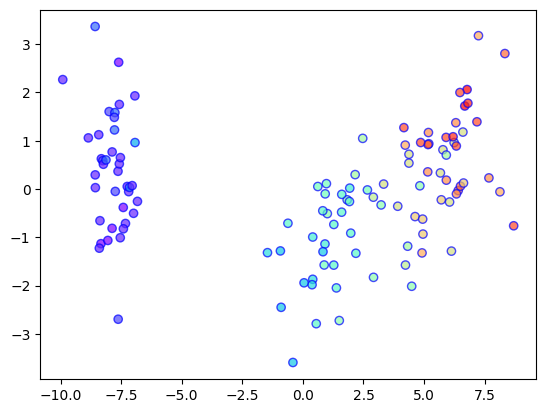

In [4]:
x=df.iloc[:,0:4].values # Index range of columns.
y=df.iloc[:,4].values # Dependent column.

sc=StandardScaler() # Standardizes range of features/variables.
x=sc.fit_transform(x)

le=LabelEncoder() # Converting categorical data to numerical data
y=le.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

lda=LinearDiscriminantAnalysis(n_components=2)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='b')
classifier=RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print('Accuracy: '+str(accuracy_score(y_test,y_pred)))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)